In [75]:
import json
import pandas as pd
from nltk.corpus import stopwords

#Reading json object containing daily news
with open('C:/Users/Ramon/Documents/CODING/Projects/Web_scraping/Google_scrapper/Outputs/cryptocurrency_news.txt') as f:
    dict = json.load(f)



index = len(dict)
df = pd.DataFrame(dict.items())
df.rename(columns={1:'Day_news',0:'Date'},inplace=True)
df['Day_news'] = df['Day_news'].apply(lambda x:''.join(x))
df.head()

,Date,Day_news
0,1/1/2016,Bitcoin's Big Challenge in 2016: Reaching 100 ...
1,2/1/2016,CRYPTO20 - First Tokenized Cryptocurrency Inde...
2,3/1/2016,Ethereum Announces the Launch of Homestead - C...
3,4/1/2016,Vatican Slated as First State Adopters of Cryp...
4,5/1/2016,ELSA-GB: Societatea Energetica Electrica SA - ...


In [76]:
from textblob import TextBlob

Polarity = []
for i in df['Day_news']:

    Pol = list(TextBlob(i).sentiment)[0]
    Polarity.append(Pol)
    
df['Sentiment'] = Polarity

dates = []

for i in df['Date']: #Changing format of dates so that we can iterate in yfinance and get the exact price of bitcoin for each data entry
    
    date = '-'.join([i.zfill(2) for i in i.split('/')][::-1])
    dates.append(date)
    
df['Date'] = dates
df['Date'] = df['Date'].astype(str)

with open('C:/Users/Ramon/Documents/CODING/Projects/NLP/Sentiment analysis/Theme/Cryptocurrency/Dates.txt','w') as f:
    f.writelines(f'{dates}')
    f.close
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2233 non-null   object 
 1   Day_news   2233 non-null   object 
 2   Sentiment  2233 non-null   float64
dtypes: float64(1), object(2)
memory usage: 52.5+ KB


In [77]:
#Getting price of bitcoin for each date
import yfinance as yf

ticker = 'BTC-USD'
daily_price = []

price = pd.DataFrame(yf.download(tickers=ticker,interval='1d',start=dates[0],end=dates[-1])['Close'])
price.reset_index(inplace=True)
price['Date'] = price['Date'].astype(str)
price.head()
price.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   Close   2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


<AxesSubplot:xlabel='Date'>

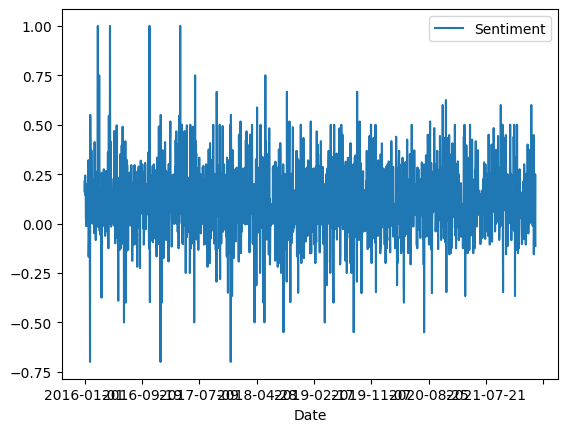

In [84]:
import numpy as np
filtered_prices = []

df_model = pd.DataFrame.merge(df,price,on='Date')
df_model['Day_news'].replace('', np.nan, inplace=True)
df_model.dropna(subset=['Day_news'],inplace= True)
df_model.head(-1)
df_model.plot(x='Date',y='Sentiment')